# Intro to text processing in Deep Learning

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

A language model is a model that has been trained to guess what the next word in a text is (having read the ones before) . . .

# How to input text to Neural Networks?

It's very good question because as we know it; NN works with vectors.

Another problem is that sentences can have different lengths, and documents can be very long and made of sentences of different lengths. 

* Tokenization: Convert the text into a list of words

* Numericalization: Make a list of all of the unique words that appear (the vocabulary or sometimes called dictionnary), and convert each word into a number, by looking up its index in the vocabulary/dictionnary

* Data loader creation: class which automatically handles creating a dependent variable that is offset from the independent variable by one token. 

* Language Model creation: We need a special kind of model that handles input lists which could be arbitrarily big or small. In this lab we will use a recurrent neural network (RNN). 

## Tokenization

Tokenization is the process of converting sentences into tokens. This process can differ for every languages. For eg in German or in Polish, we can create really long words from many, many pieces.
Japanese and Chinese don't really have a well-defined concept of word.
Therefore there are multiple strategy for tokenization:
* Word-based: Split a sentence on spaces, as well as applying language-specific rules to try to separate parts of meaning even when there are no spaces (such as turning "don't" into "do n't"). Generally, punctuation marks are also split into separate tokens.
* Subword based: Split words into smaller parts, based on the most commonly occurring substrings. For instance, "occasion" might be tokenized as "o c ca sion."
* Character-based: Split a sentence into its individual characters.


### Wordbased

In [2]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import numpy as np
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

In [3]:
tokens = tokenizer("This is a sentence")
list(tokens)

[This, is, a, sentence]

### Subword Based

Here we use a subword tokenization algorithms. Subword tokenization algorithms rely on the principle that most common words should be left as is, but rare words should be decomposed in meaningful subword units. For instance “annoyingly” might be considered a rare word and decomposed as “annoying” and “ly”. This is especially useful in agglutinative languages such as Turkish, where you can form (almost) arbitrarily long complex words by stringing together some subwords.

In [4]:
from pathlib import Path
from tokenizers import BertWordPieceTokenizer
paths = [str(x) for x in Path("data/processed/OpenSubtitles").glob("**/*.txt")]
vocabulary_size=52_000

In [5]:
tokenizer = BertWordPieceTokenizer()

In [6]:
# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=3, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
tokenizer.save("./data/model/robert-subword2", pretty=True)

In [7]:
encoded = tokenizer.encode("It's wednesday my dude!")
encoded.tokens

['it', "'", 's', 'wed', '##nes', '##day', 'my', 'dud', '##e', '!']

### Characters based

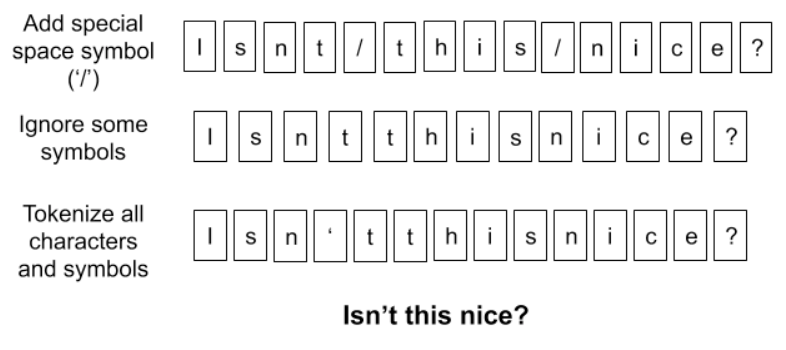

In [8]:
from IPython.display import Image
Image(filename="data/images/chars-tokenization.png")

In [9]:
from tokenizers import CharBPETokenizer
tokenizer2 = CharBPETokenizer()
# Customize training
tokenizer2.train(files=paths, vocab_size=vocabulary_size, min_frequency=3, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
tokenizer2.save("./data/model/robert-charbpe2", pretty=True)

In [10]:
encoded = tokenizer2.encode("It's wednesday my dude!")
encoded.tokens

['It</w>',
 "'</w>",
 's</w>',
 'w',
 'ed',
 'nes',
 'day</w>',
 'my</w>',
 'du',
 'de</w>',
 '!</w>']

## Numericalization

Numericalization is the process of mapping tokens to integers.

  * Build a dictionnary/vocabulary
  * Replace each level with its index in the dictionnary.

Earlier when we called train on our corpus. What we did is:
  * Parse our corpus
  * Tokenize it
  * Build a dictionnary  

In [11]:
encoded.ids

[13489, 835, 651, 91, 1198, 1663, 10174, 1501, 3472, 1255, 1098]

In [12]:
encoded.tokens

['It</w>',
 "'</w>",
 's</w>',
 'w',
 'ed',
 'nes',
 'day</w>',
 'my</w>',
 'du',
 'de</w>',
 '!</w>']

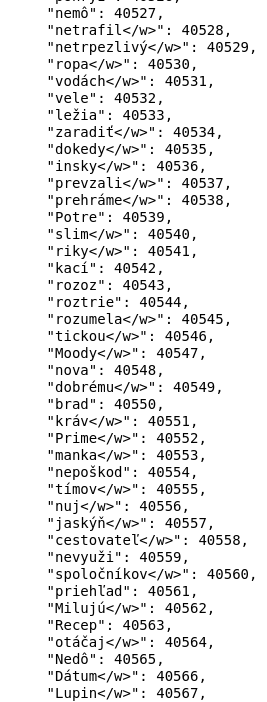

In [13]:
Image(filename="data/images/slovak dict.png")

## Entity Embedding

The numerical data we have right now can be directly fed to the model (with some optional preprocessing). However those number does not encode any meaningful semantics for our model. 
In an ideal world, we would like to represent each word with for e.g. a 300 dimension vector where each number represent something.

$$q_\text{politician} = \left[ \overbrace{2.3}^\text{can run}, \overbrace{5.3}^\text{likes to lie},  
\overbrace{9.4}^\text{likes coffee}, \dots \right]$$

This notion permit us to so math with words.
Pretty cool right.

### Let's try with a pretrained model

In [14]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [15]:
nlp.vocab["bicycle"].vector

array([ 7.7326e-01,  1.5436e-01, -2.7491e-01, -7.1108e-01, -3.1969e-02,
        3.7373e-01, -1.5636e-01, -9.8669e-02, -8.2801e-01,  1.4941e+00,
       -4.7188e-01,  1.4972e-01, -4.9457e-01,  8.8788e-01, -6.1892e-01,
        6.0215e-01, -1.4498e-01,  1.4326e+00,  5.5806e-01, -4.6155e-02,
        7.8912e-02,  4.2033e-02,  4.9769e-01, -2.8744e-01,  5.1224e-01,
        6.6253e-01,  4.3187e-02, -2.1413e-01,  4.4540e-01,  7.1483e-01,
        4.8403e-01, -2.9543e-01, -2.2346e-01,  2.7801e-01, -3.1871e-01,
       -1.7999e-01,  5.5439e-01, -2.6797e-01,  3.1179e-01,  2.2838e-01,
        3.0350e-01,  2.1660e-01, -6.1462e-03,  1.1189e-01, -2.4877e-01,
        1.7644e-01,  4.7624e-01, -4.1609e-01,  1.4189e-02,  1.2113e-01,
        5.9873e-02, -1.7802e-01,  2.5756e-01,  3.9513e-02,  7.4426e-02,
        1.6572e-01, -1.5774e-02,  1.1102e-01,  1.5401e-01,  1.3900e-01,
       -7.7789e-02, -7.6739e-02,  7.1694e-02,  5.7986e-01,  3.0315e-01,
       -3.8421e-01, -2.3849e-02, -6.8377e-02, -5.2470e-02,  1.97

In [16]:
nlp.vocab["bicycle"].vector.shape

(300,)

In [17]:
vec = nlp.vocab["bicycle"].vector + nlp.vocab["engine"].vector + nlp.vocab["helmet"].vector

In [18]:
vec

array([ 1.64757001e+00, -4.29480016e-01, -7.86499977e-01, -1.02551198e+00,
       -4.01809007e-01,  2.69129992e-01,  1.57520026e-02, -3.39866996e-01,
       -5.30610025e-01,  3.16053987e+00, -2.54166007e-01, -5.72350025e-01,
       -1.89015985e-01,  1.32772994e+00, -1.54157495e+00,  2.91149020e-01,
       -5.79890013e-01,  5.14075994e+00,  6.33469939e-01, -5.21584988e-01,
        5.67721963e-01, -8.00377011e-01,  1.09967399e+00, -1.05500007e+00,
        3.44819993e-01,  9.73360002e-01, -6.08933032e-01,  1.51100038e-02,
        4.03780013e-01,  1.30927992e+00,  4.87209976e-01, -7.84759998e-01,
       -3.19348991e-01,  9.86999989e-01, -5.36329985e-01, -1.02432895e+00,
        4.70573932e-01,  5.73979974e-01,  6.30599976e-01,  4.31792974e-01,
        1.59272003e+00, -1.90980017e-01, -2.56102204e-01,  5.92539966e-01,
        5.67479968e-01,  4.09819990e-01,  5.71439981e-01, -1.39449984e-01,
       -3.11321974e-01,  7.60760009e-01,  9.66313004e-01,  1.23833999e-01,
        4.17126983e-01,  

In [19]:
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'motorcycle', 'bicycle', 'bike', 'helmet'}


In [20]:
vec = nlp.vocab["car"].vector - nlp.vocab["tires"].vector + 2 * nlp.vocab["wing"].vector + nlp.vocab["kerosene"].vector
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'flying', 'wings', 'wing', 'airplane'}


In [21]:
vec = nlp.vocab["flamethrower"].vector - nlp.vocab["flame"].vector + nlp.vocab["water"].vector
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'water', 'seawater', 'sewage', 'rainwater'}


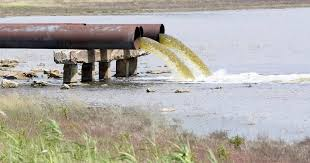

In [22]:
Image(filename="data/images/sewage.jpeg")

In [23]:
vec = nlp.vocab["flamethrower"].vector - nlp.vocab["gun"].vector 
ms = nlp.vocab.vectors.most_similar(
    np.asarray([vec]), n=10, sort=True)
words = set([nlp.vocab.strings[w].lower() for w in ms[0][0]])
print(words)

{'flamethrowing', 'flamethrower', 'sandworm', 'venusaur', 'fireblast'}


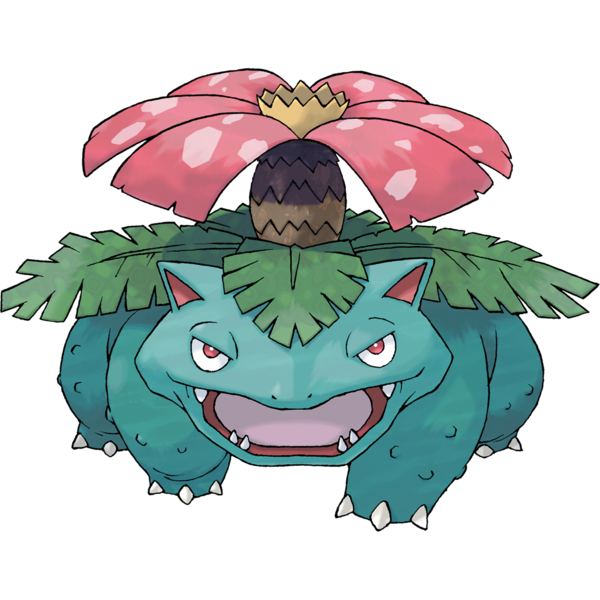

In [24]:
Image(filename="data/images/venusaur.png")

At the beginning we will initialize those number randomly. Therefore when we train our model, it will optimize at the same time the meaning of the word. In our case find the proper vector that represents a word.

So how do we generate our embedding vector ?
Simple:
    1. Convert our encoded input to one hot encoded vector
    2. Pass it through a Linear layer
Most DL framework implement this through Embedding layer so you don't have to do it manualy.  

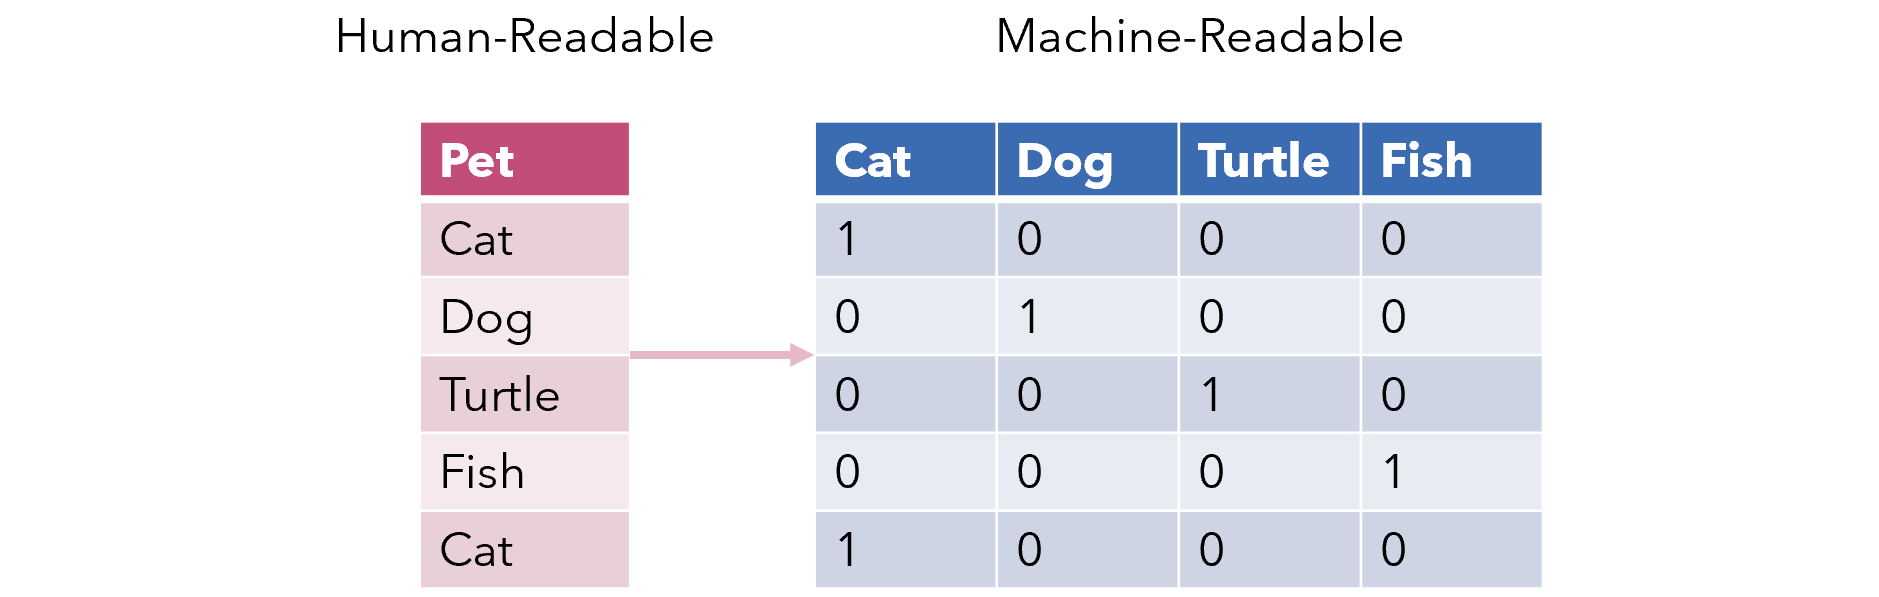

In [25]:
Image(filename="./data/images/onehot.png")

Now we know how to process our data. Let's send it to our network.

# RNN

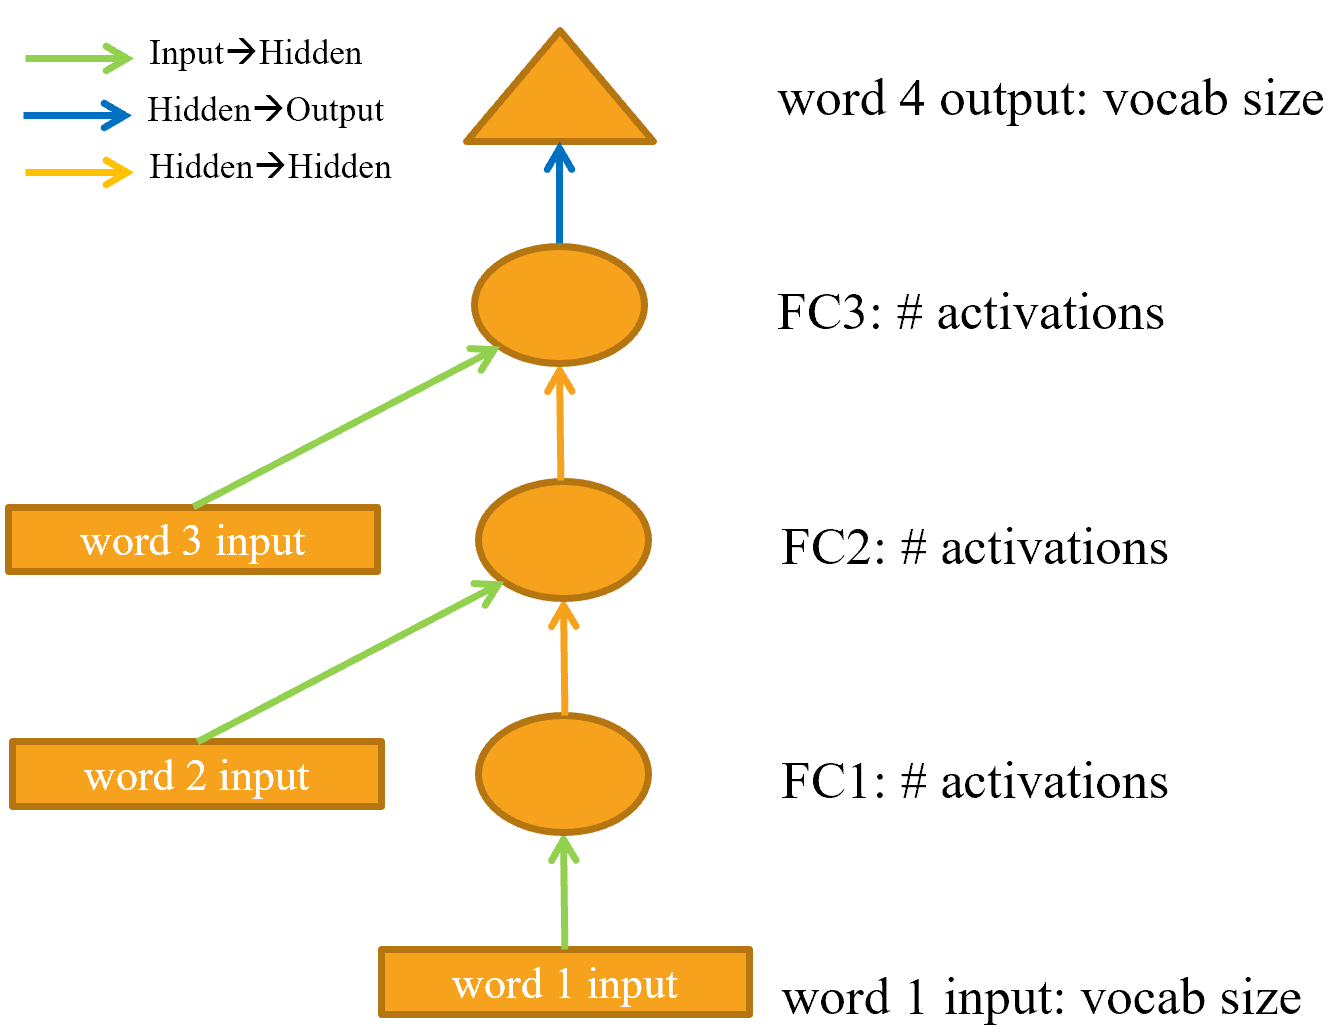

In [40]:
Image(filename="./data/images/simplernn.png")

In [26]:
from keras.utils import to_categorical
from keras.utils.data_utils import get_file
from keras.models import Sequential, load_model
from keras.layers import Embedding, LSTM, Dense, SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


Let's take the subtitle of 6 randoms movies/tv shows in Slovak.

In [27]:
raw_text = ""
for i in range(6):
    with open(paths[i], encoding = 'utf-8') as f:
        raw_text += f.read().replace('--', ' ').replace('-', ' ').replace('\n', ' ')

In [28]:
print('corpus length:', len(raw_text))
print('example text:', raw_text[5:100])

corpus length: 126318
example text: , že meškám.   Je mi ľúto!   Dobre, radšej sa hýb! Diky.   Aké milé!   Všetko najlepšie! Počkaj


In [29]:
enc = tokenizer.encode(raw_text)
enc.tokens

['sorry',
 ',',
 'ze',
 'meskam',
 '.',
 'je',
 'mi',
 'luto',
 '!',
 'dobre',
 ',',
 'radsej',
 'sa',
 'hyb',
 '!',
 'diky',
 '.',
 'ake',
 'mile',
 '!',
 'vsetko',
 'najlepsie',
 '!',
 'pockajte',
 ',',
 'ukazem',
 'vam',
 'nieco',
 '!',
 'aha',
 ',',
 'toto',
 'mam',
 'od',
 'timi',
 '##ho',
 '.',
 'mas',
 'este',
 'blo',
 '##cek',
 '?',
 'dakujem',
 '.',
 'a',
 'toto',
 'je',
 'od',
 'nas',
 'vsetkych',
 '.',
 '.',
 '.',
 '.',
 'to',
 'je',
 'pravda',
 ':',
 'zeny',
 'mozu',
 'mat',
 'aj',
 '3',
 'krat',
 'orgazmus',
 ',',
 'kym',
 'chlapi',
 'len',
 'raz',
 '.',
 'skoro',
 'som',
 'sa',
 'z',
 'toma',
 'zblaznila',
 '.',
 '.',
 '.',
 '.',
 'sex',
 'je',
 'lepsi',
 'nez',
 'ranna',
 'rozcvi',
 '##cka',
 '.',
 'cau',
 'cheyenne',
 '!',
 'hej',
 '!',
 'ahoj',
 '!',
 'pocula',
 'som',
 ',',
 'ze',
 'mas',
 'narodky',
 '.',
 'no',
 '.',
 'vsetko',
 'najlepsie',
 '!',
 'dik',
 '.',
 'ako',
 'sa',
 'volas',
 '?',
 'in',
 '##ken',
 'aha',
 '.',
 'tazko',
 'sa',
 'to',
 'pamata',
 '.',
 's

In [30]:
enc.ids

[7916,
 16,
 682,
 6880,
 18,
 658,
 708,
 1675,
 5,
 786,
 16,
 1802,
 661,
 5968,
 5,
 5341,
 18,
 1464,
 2834,
 5,
 901,
 2076,
 5,
 2316,
 16,
 4244,
 890,
 844,
 5,
 2720,
 16,
 847,
 771,
 746,
 18710,
 679,
 18,
 906,
 913,
 3258,
 2107,
 35,
 1027,
 18,
 43,
 847,
 658,
 746,
 816,
 1607,
 18,
 18,
 18,
 18,
 648,
 658,
 1578,
 30,
 2323,
 2390,
 971,
 858,
 23,
 1871,
 21069,
 16,
 1277,
 1804,
 780,
 1405,
 18,
 1833,
 676,
 661,
 68,
 12470,
 9714,
 18,
 18,
 18,
 18,
 1893,
 658,
 3464,
 860,
 45097,
 28741,
 926,
 18,
 2454,
 41409,
 5,
 865,
 5,
 1071,
 5,
 2829,
 676,
 16,
 682,
 906,
 28881,
 18,
 767,
 18,
 901,
 2076,
 5,
 5485,
 18,
 713,
 661,
 4252,
 35,
 984,
 15489,
 2720,
 18,
 3212,
 661,
 648,
 15086,
 18,
 669,
 3480,
 656,
 3035,
 35,
 41197,
 483,
 16,
 1284,
 35,
 763,
 16,
 714,
 22193,
 1002,
 913,
 1656,
 17996,
 18,
 7916,
 16,
 714,
 7971,
 680,
 758,
 5911,
 18,
 1014,
 1482,
 10657,
 2552,
 3245,
 5,
 11527,
 8170,
 16,
 48356,
 1130,
 661,
 5,
 272

In [31]:
step = 3
maxlen = 40
X = []
y = []
for i in range(0, len(enc.tokens) - maxlen, step):
    sentence = enc.tokens[i:i + maxlen]
    next_word = enc.tokens[i + maxlen]
    X.append([tokenizer.token_to_id(token) for token in sentence])
    y.append(tokenizer.token_to_id(next_word))

# keras expects the target to be in one-hot encoded format,
# ideally we would use a generator that performs this conversion
# only on the batch of data that is currently required by the model
# to be more memory-efficient
X = np.array(X)
Y = to_categorical(y, vocabulary_size)
print('sequence dimension: ', X.shape)
print('target dimension: ', Y.shape)
print('example sequence:\n', X[0])

sequence dimension:  (10249, 40)
target dimension:  (10249, 52000)
example sequence:
 [ 7916    16   682  6880    18   658   708  1675     5   786    16  1802
   661  5968     5  5341    18  1464  2834     5   901  2076     5  2316
    16  4244   890   844     5  2720    16   847   771   746 18710   679
    18   906   913  3258]


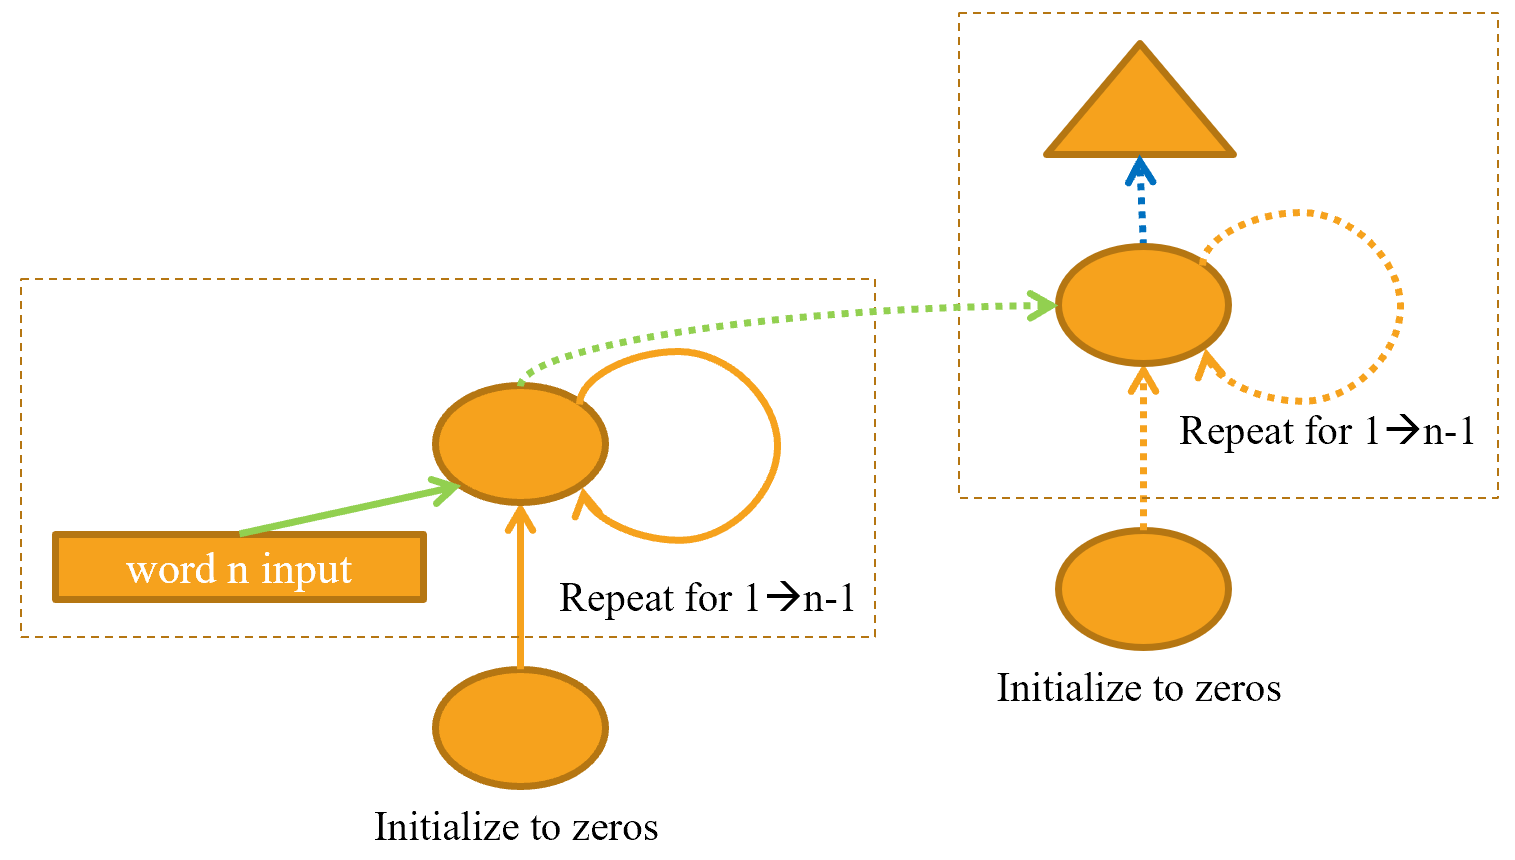

In [32]:
Image(filename="./data/images/att_00025.png")

In [33]:
# define the network architecture: a embedding followed by LSTM
embedding_size = 50
rnn_size = 256
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size))
model1.add(SimpleRNN(rnn_size))
model1.add(Dense(vocabulary_size, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          2600000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               78592     
_________________________________________________________________
dense_1 (Dense)              (None, 52000)             13364000  
Total params: 16,042,592
Trainable params: 16,042,592
Non-trainable params: 0
_________________________________________________________________


In [34]:
epochs = 10
batch_size = 64
validation_split = 0.2
history = model1.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = validation_split)

/opt/anaconda/envs/pytorch/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8199 samples, validate on 2050 samples
Epoch 1/10
8199/8199 [==============================] - 7s 896us/step - loss: 7.7574 - val_loss: 8.0141
Epoch 2/10
8199/8199 [==============================] - 6s 764us/step - loss: 6.3686 - val_loss: 8.0387
Epoch 3/10
8199/8199 [==============================] - 6s 770us/step - loss: 6.4485 - val_loss: 8.1685
Epoch 4/10
8199/8199 [==============================] - 6s 762us/step - loss: 6.6612 - val_loss: 8.2794
Epoch 5/10
8199/8199 [==============================] - 6s 761us/step - loss: 6.7548 - val_loss: 7.9392
Epoch 6/10
8199/8199 [==============================] - 6s 767us/step - loss: 6.2510 - val_loss: 8.3766
Epoch 7/10
8199/8199 [==============================] - 6s 763us/step - loss: 5.9359 - val_loss: 8.6833
Epoch 8/10
8199/8199 [==============================] - 6s 768us/step - loss: 5.6088 - val_loss: 8.7742
Epoch 9/10
8199/8199 [==============================] - 6s 768us/step - loss: 5.2622 - val_loss: 8.9756
Epoch 10/10
8199

In [35]:
def check_prediction(model, num_predict):
    for i in range(num_predict):
        x = X[i]
        prediction = model.predict(x[np.newaxis, :], verbose = 0)
        index = np.argmax(prediction)
        print(" ".join([tokenizer.id_to_token(i) for i in x]))
        print('Actual words: ', tokenizer.id_to_token(y[i]))
        print('Predicted words: ', tokenizer.id_to_token(index))
        print("#################################################")
num_predict = 5
check_prediction(model1, num_predict)

sorry , ze meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo
Actual words:  ##cek
Predicted words:  ##ud
#################################################
meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem
Actual words:  .
Predicted words:  .
#################################################
mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto
Actual words:  je
Predicted words:  ,
#################################################
dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto je od nas
Actual words:  vsetkych
Predicted words:  spolu
######

## Exploding or Vanishing 

In practice, creating accurate models from this kind of RNN is difficult. The reason this is challenging is because of what happens when you multiply by a matrix multiples times. For example, if you multiply by 2, starting at 1, you get the sequence 1, 2, 4, 8,... after 32 steps you are already at 4,294,967,296. A similar issue happens if you multiply by 0.5: you get 0.5, 0.25, 0.125… and after 32 steps it's 0.00000000023. As you can see, multiplying by a number even slightly higher or lower than 1 results in an explosion or disappearance of our starting number, after just a few repeated multiplications.

This is a problem, because the way computers store numbers (known as "floating point") means that they become less and less accurate the further away the numbers get from zero.

This inaccuracy means that often the gradients calculated for updating the weights end up as zero or infinity for deep networks.

# LSTM

In practice, RNNs are really bad at retaining memory of what happened much earlier in the sentence that's why LSTM was introduced back in 1997 by Jürgen Schmidhuber and Sepp Hochreiter

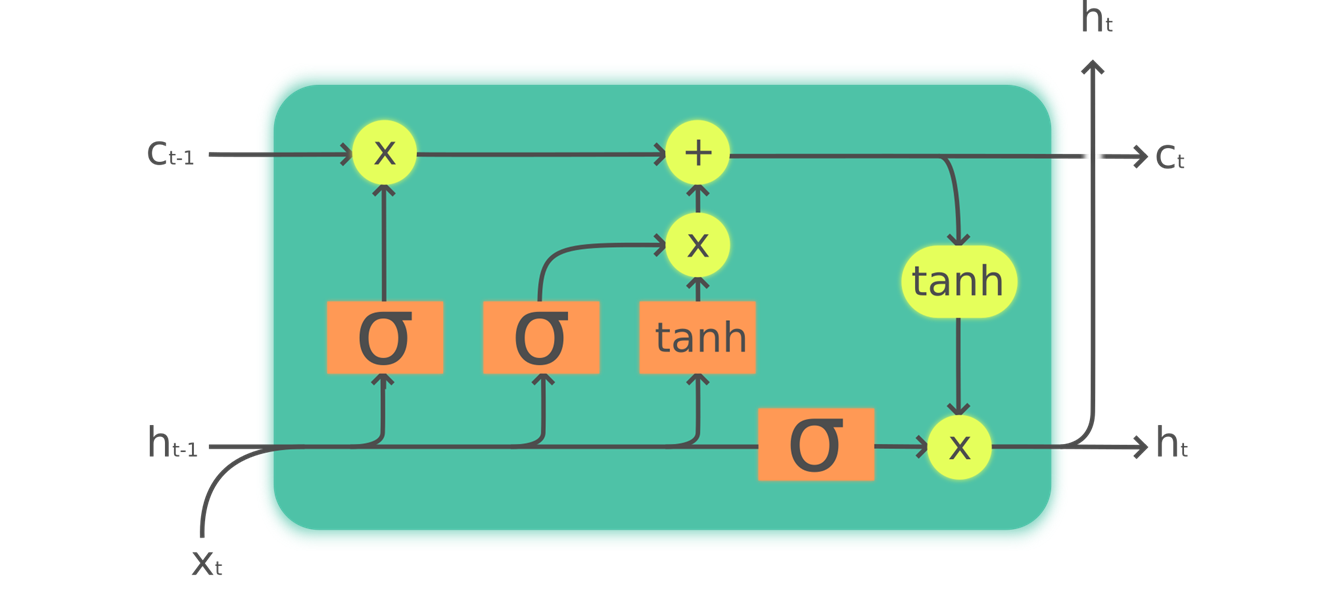

In [36]:
Image(filename="./data/images/LSTM.png")

In [37]:
# define the network architecture: a embedding followed by LSTM
embedding_size = 50
lstm_size = 256
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size))
model1.add(LSTM(lstm_size, return_sequences = True))
model1.add(LSTM(lstm_size))
model1.add(Dense(vocabulary_size, activation = 'softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model1.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          2600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         314368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 52000)             13364000  
Total params: 16,803,680
Trainable params: 16,803,680
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model1.fit(X, Y, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = validation_split)

Train on 8199 samples, validate on 2050 samples
Epoch 1/10
8199/8199 [==============================] - 15s 2ms/step - loss: 7.8344 - val_loss: 8.0156
Epoch 2/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.4038 - val_loss: 8.4149
Epoch 3/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3652 - val_loss: 8.6423
Epoch 4/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3625 - val_loss: 8.7905
Epoch 5/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3496 - val_loss: 8.8603
Epoch 6/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.3394 - val_loss: 8.8041
Epoch 7/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.2990 - val_loss: 8.1403
Epoch 8/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.2268 - val_loss: 8.1698
Epoch 9/10
8199/8199 [==============================] - 15s 2ms/step - loss: 6.1898 - val_loss: 8.3917
Epoch 10/10
8199/8199 [==

In [39]:
check_prediction(model1, num_predict)

sorry , ze meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo
Actual words:  ##cek
Predicted words:  .
#################################################
meskam . je mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem
Actual words:  .
Predicted words:  .
#################################################
mi luto ! dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto
Actual words:  je
Predicted words:  .
#################################################
dobre , radsej sa hyb ! diky . ake mile ! vsetko najlepsie ! pockajte , ukazem vam nieco ! aha , toto mam od timi ##ho . mas este blo ##cek ? dakujem . a toto je od nas
Actual words:  vsetkych
Predicted words:  .
#############

# Exercise

* Improve the data processing and NN of this code
* Build a Slovak language model using this corpus ftp://ftp.cit.fei.tuke.sk/subtitles.tar. 

# Resources

* https://arxiv.org/abs/1708.02182
* https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9
* https://jalammar.github.io/illustrated-transformer/
* https://blog.floydhub.com/tokenization-nlp/